Nombre de chaînes vides avant : 70
Nombre de chaînes vides apres : 0
shape apres suppression emojis et chaines vides (1654, 3)
J'adore ce produit !! 😊
j'adore ce produit
(1654, 3)
Label
Positif    1478
Neutre      108
Négatif      68
Name: count, dtype: int64


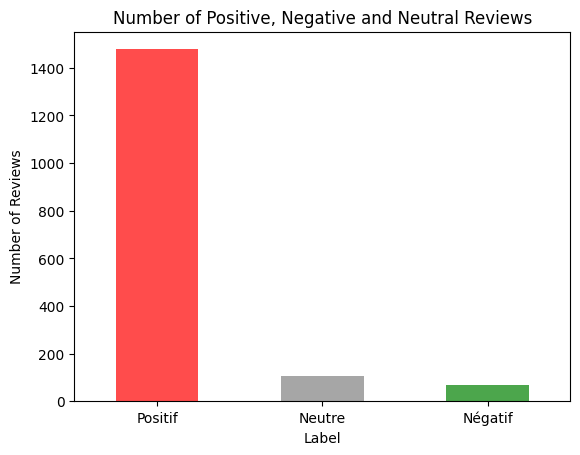

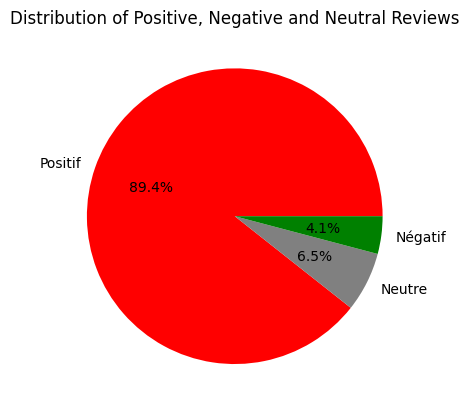

In [40]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df=pd.read_csv('dfcleaned - dfcleaned.csv', sep=';')#data ba3d ma zidneha les lignes negatifs ou neutre mil scraping il theni labelise bil note w jawha behy 
df = df.dropna(subset=['Commentaire'])
df['Commentaire'] = df['Commentaire'].str.lower()

# Supprimer les doublons
df = df.drop_duplicates(subset='Commentaire', keep='first')
# Définir une fonction pour supprimer les émojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["  # Range of emojis in Unicode
        "\U0001F600-\U0001F64F"  # Emoticônes (Smileys)
        "\U0001F300-\U0001F5FF"  # Symboles et pictogrammes
        "\U0001F680-\U0001F6FF"  # Transport et symboles divers
        "\U0001F700-\U0001F77F"  # Symboles supplémentaires
        "\U0001F780-\U0001F7FF"  # Supp. Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supp. Arrows-C, Extended-C
        "\U0001F900-\U0001F9FF"  # Supp. Arrows-D, Objects
        "\U0001FA00-\U0001FA6F"  # Chess, symbols, new emojis
        "\U0001FA70-\U0001FAFF"  # Symbols and pictograms extended
        "\U00002702-\U000027B0"  # Divers symboles et pictogrammes
        "\U000024C2-\U0001F251"  # Autres symboles divers
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)  # Remplacer par une chaîne vide

# Appliquer la fonction à la colonne 'Commentaire'
df['Commentaire'] = df['Commentaire'].apply(remove_emojis)
# Vérifier les chaînes vides ou contenant uniquement des espaces dans la colonne 'Commentaire'
empty_strings = df['Commentaire'].str.strip() == ''  # 'strip()' supprime les espaces avant et après
num_empty_strings = (df['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides avant : {num_empty_strings}")

# Supprimer les lignes où 'Commentaire' est vide ou uniquement composé d'espaces
df_cleaned = df[df['Commentaire'].str.strip() != '']

num_empty_strings = (df_cleaned['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides apres : {num_empty_strings}")
print("shape apres suppression emojis et chaines vides",df_cleaned.shape)

df_cleaned=df_cleaned.reset_index(drop=True)
print("J'adore ce produit !! 😊")
print("j'adore ce produit")
print(df_cleaned.shape)
count_labels = df_cleaned['Label'].value_counts()
print(count_labels) 
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels' , color=['red', 'grey', 'green'],alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews') 
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()
# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

la data augmentation (remplacement de synonymes)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                    Commentaire  Note    Label
0        dima nekhouh wou naawd     5  Positif
1                      j\’adore     5  Positif
2                     mche maya     4  Positif
3                 je recommande     5  Positif
4  le prix est très raisonnable     5  Positif
(1830, 3)
Label
Positif    1478
Neutre      216
Négatif     136
Name: count, dtype: int64


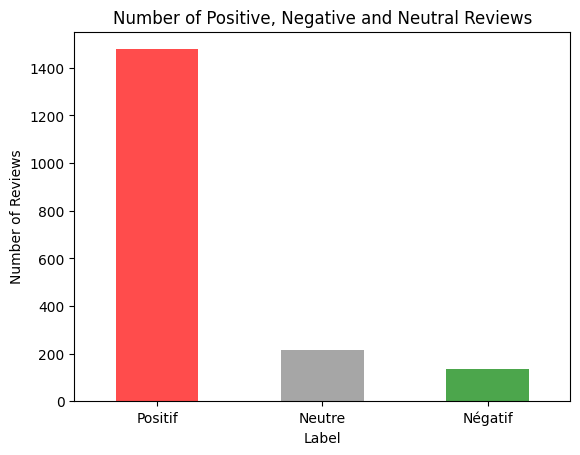

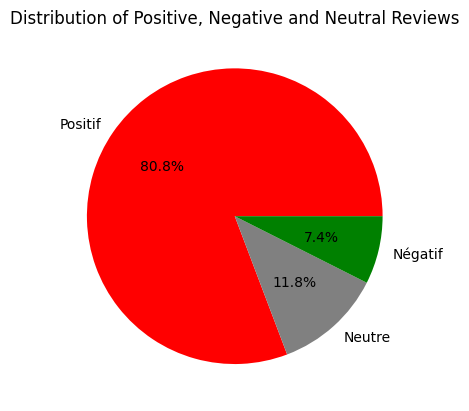

nombre des duplicats 97
                                            Commentaire  Note    Label
0                                dima nekhouh wou naawd     5  Positif
1                                              j\’adore     5  Positif
2                                             mche maya     4  Positif
3                                         je recommande     5  Positif
4                          le prix est très raisonnable     5  Positif
...                                                 ...   ...      ...
1825                                            à testé     2   Neutre
1826  moch tayara lha9 mamchach m3aya\r\ntala3li hbo...     1  Négatif
1827  moch tayara lha9 mamchach m3aya tala3li hbob f...     1  Négatif
1828  ma mchech m3aya jemla\r\nki na3mlou wejhi ychi...     1  Négatif
1829  ma mchech m3aya jemla Ki na3mlou wejhi ychi7 W...     1  Négatif

[1830 rows x 3 columns]


In [41]:
import random
from nltk.corpus import wordnet
import nltk
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('wordnet')

# Exemple de fonction pour remplacer un mot par un synonyme
def synonym_augmentation(text):
    words = text.split()
    augmented_words = []
    
    for word in words:
        # Obtenir les synonymes du mot via WordNet
        synonyms = wordnet.synsets(word)
        if synonyms:
            # Prendre le premier synonyme disponible (s'il y en a)
            synonym = random.choice(synonyms).lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    
    return ' '.join(augmented_words)

# Initialiser une liste pour stocker les données augmentées
augmented_data = []

for index, row in df_cleaned.iterrows():
    original_comment = row['Commentaire']
    note = row['Note']
    label = row['Label']

    # Ajouter le commentaire original
    augmented_data.append({'Commentaire': original_comment, 'Note': note, 'Label': label})

    # Ne faire l'augmentation que pour les labels négatifs ou neutres
    if label in ['Négatif', 'Neutre']:
        augmented_comment = synonym_augmentation(original_comment)
        augmented_data.append({'Commentaire': augmented_comment, 'Note': note, 'Label': label})

# Créer un nouveau dataframe avec les données augmentées
augmented_df = pd.DataFrame(augmented_data)

# Afficher un aperçu des données augmentées
print(augmented_df.head())
print(augmented_df.shape)

# Distribution des labels
count_labels = augmented_df['Label'].value_counts()
print(count_labels)

# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels', color=['red', 'grey', 'green'], alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews')
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()
print("nombre des duplicats",augmented_df.duplicated().sum())
print(augmented_df)

anotonyme 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                    Commentaire  Note    Label
0        dima nekhouh wou naawd     5  Positif
1                      j\’adore     5  Positif
2                     mche maya     4  Positif
3                 je recommande     5  Positif
4  le prix est très raisonnable     5  Positif
(2661, 3)
Label
Positif    1478
Négatif     751
Neutre      432
Name: count, dtype: int64


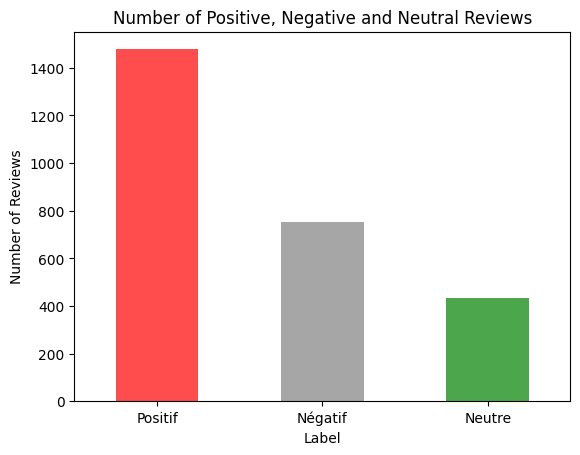

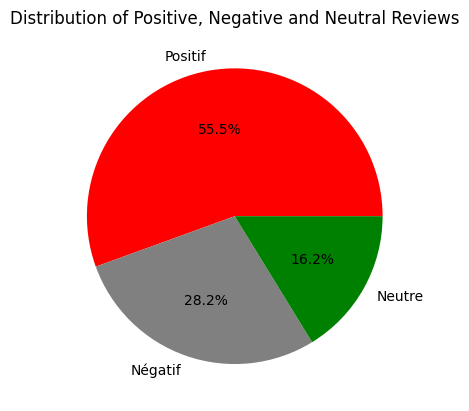

nombre des duplications 375
nombre des duplications après suppression 0
Label
Positif    1456
Négatif     595
Neutre      235
Name: count, dtype: int64


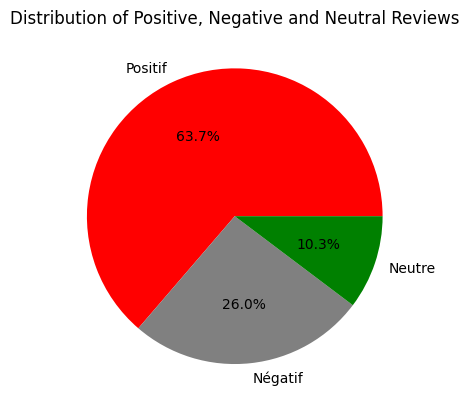

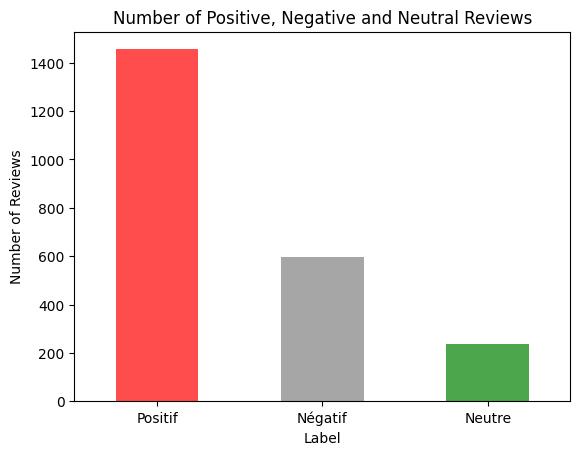

                                            Commentaire  Note    Label
0                                dima nekhouh wou naawd     5  Positif
1                                              j\’adore     5  Positif
2                                             mche maya     4  Positif
3                                         je recommande     5  Positif
4                          le prix est très raisonnable     5  Positif
...                                                 ...   ...      ...
2653  moch tayara lha9 mamchach m3aya\r\ntala3li hbo...     1  Négatif
2657  ma mchech m3aya jemla\r\nki na3mlou wejhi ychi...     1  Négatif
2658  ma mchech m3aya jemla qi na3mlou wejhi ychi7 w...     1  Négatif
2659  ma mchech m3aya jemla Ki na3mlou wejhi ychi7 W...     1  Négatif
2660  ma mchech m3aya jemla qi na3mlou wejhi ychi7 w...     1  Négatif

[2286 rows x 3 columns]


In [42]:
import random
from nltk.corpus import wordnet
import nltk
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('wordnet')

# Liste de paires de mots positifs et négatifs
positive_negative_dict = {
    'bien': 'mal',
    'excellent': 'horrible',
    'parfait': 'terrible',
    'bon': 'mauvais',
    'super': 'affreux',
    'satisfait': 'insatisfait',
    'réussi': 'échoué',
    'agréable': 'désagréable',
    'positif': 'négatif',
    'heureux': 'triste',
    'top': 'nul',
    'good': 'bad',
    'aime': 'déteste',
    'recommend': 'déconseille',
    'acceptable': 'inacceptable',
    'tayara': 'sfer',
    'magnifique': 'affreux',
    'meuilleur': 'pire',
    # Ajouter plus de paires au besoin
}

# Fonction pour inverser les mots positifs en négatifs
def inverse_sentiment_augmentation(text):
    words = text.split()
    augmented_words = []
    found_positive_word = False  # Pour vérifier si un mot positif est trouvé
    
    for word in words:
        # Remplacer les mots positifs par leurs équivalents négatifs
        if word.lower() in positive_negative_dict:
            augmented_words.append(positive_negative_dict[word.lower()])
            found_positive_word = True
        else:
            augmented_words.append(word)
    
    # Retourner le texte inversé et un indicateur si un mot positif a été trouvé
    return ' '.join(augmented_words), found_positive_word

# Initialiser une liste pour stocker les données augmentées
augmented_data_antonyme = []

for index, row in augmented_df.iterrows():
    original_comment = row['Commentaire']
    note = row['Note']
    label = row['Label']

    # Ajouter le commentaire original
    augmented_data_antonyme.append({'Commentaire': original_comment, 'Note': note, 'Label': label})

    # Augmentation pour les commentaires positifs en générant un commentaire négatif
    if label == 'Positif':
        inverted_comment, found_positive_word = inverse_sentiment_augmentation(original_comment)
        
        # Si un mot positif a été trouvé et remplacé, ajouter la version négative
        if found_positive_word:
            augmented_data_antonyme.append({'Commentaire': inverted_comment, 'Note': note, 'Label': 'Négatif'})

    # Augmentation des labels négatifs ou neutres avec la méthode de synonymes
    if label in ['Négatif', 'Neutre']:
        augmented_comment = synonym_augmentation(original_comment)
        augmented_data_antonyme.append({'Commentaire': augmented_comment, 'Note': note, 'Label': label})

# Créer un nouveau dataframe avec les données augmentées
augmented_df_antonyme_syno = pd.DataFrame(augmented_data_antonyme)

# Afficher un aperçu des données augmentées
print(augmented_df_antonyme_syno.head())
print(augmented_df_antonyme_syno.shape)

# Distribution des labels
count_labels = augmented_df_antonyme_syno['Label'].value_counts()
print(count_labels)

# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels', color=['red', 'grey', 'green'], alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews')
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

# Supprimer les doublons
print("nombre des duplications", augmented_df_antonyme_syno.duplicated().sum())
augmented_df_antonyme_syno.drop_duplicates(inplace=True)
print("nombre des duplications après suppression", augmented_df_antonyme_syno.duplicated().sum())

# Réafficher la distribution des labels après suppression des doublons
count_labels = augmented_df_antonyme_syno['Label'].value_counts()
print(count_labels)

# Pie chart après suppression des doublons
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

# Bar chart après suppression des doublons
count_labels.plot(kind='bar', title='Distribution des labels', color=['red', 'grey', 'green'], alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews')
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Enregistrer le dataframe final dans un fichier CSV
augmented_df_antonyme_syno.to_csv('final_balanced_reviwes.csv', sep=';', index=False)
print(augmented_df_antonyme_syno)


Over and under sampling

In [46]:
import pandas as pd
from sklearn.utils import resample

# Exemple : un dataframe déséquilibré avec une colonne 'Commentaire' et 'Label'
# augmented_df contient les labels 'Négatif', 'Neutre', 'Positif'

# Compter la fréquence de chaque label
label_counts = augmented_df_antonyme_syno['Label'].value_counts()
print("Nombre de commentaires par label avant équilibrage :")
print(label_counts)

# Trouver la taille de la classe majoritaire
majority_class_size = label_counts.max()

# Séparer les classes par label
df_positif = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Positif']
df_neutre = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Neutre']

df_negatif = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Négatif']

### 1. Suréchantillonnage des classes minoritaires
df_negatif_upsampled = resample( df_negatif, 
                                replace=True,     # Échantillonnage avec remplacement
                                n_samples=majority_class_size,  # Aligner sur la classe majoritaire
                                random_state=42)  # Graine aléatoire pour la reproductibilité

df_neutre_upsampled = resample(df_neutre, 
                               replace=True,     
                               n_samples=majority_class_size,  
                               random_state=42)

### 2. Sous-échantillonnage de la classe majoritaire (facultatif)
# Si tu veux éviter de surcharger la classe majoritaire, tu peux réduire sa taille
# (Si sous-échantillonnage n'est pas nécessaire, ignore cette partie)
df_positif_downsampled = resample( df_positif, 
                                  replace=False,  # Échantillonnage sans remplacement
                                  n_samples=majority_class_size,  # Aligner sur la taille des autres classes
                                  random_state=42)

# Combiner les classes échantillonnées
df_balanced = pd.concat([df_negatif_upsampled, df_neutre_upsampled, df_positif_downsampled])

# Vérifier la distribution des labels après équilibrage
print("\nNombre de commentaires par label après équilibrage :")
print(df_balanced['Label'].value_counts())

# Enregistrer le dataset équilibré dans un fichier CSV
df_balanced.to_csv('final_balanced_reviews_with_duplication.csv', sep=';', index=False)



Nombre de commentaires par label avant équilibrage :
Label
Positif    1456
Négatif     595
Neutre      235
Name: count, dtype: int64

Nombre de commentaires par label après équilibrage :
Label
Négatif    1456
Neutre     1456
Positif    1456
Name: count, dtype: int64


reduire le nombre des positifs (annuler )


Nombre de commentaires par label après réduction de la classe 'Positif' :
Label
Positif    1000
Négatif     595
Neutre      235
Name: count, dtype: int64


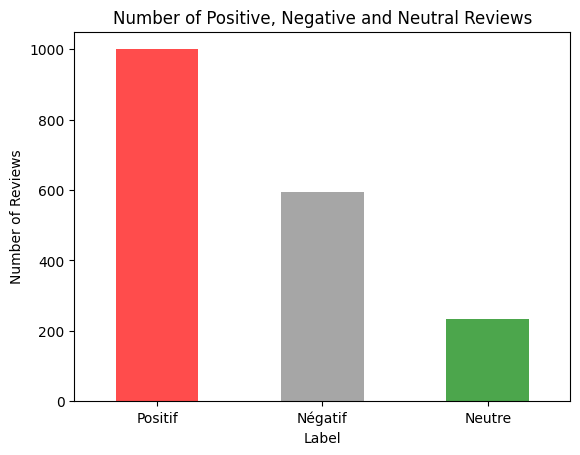

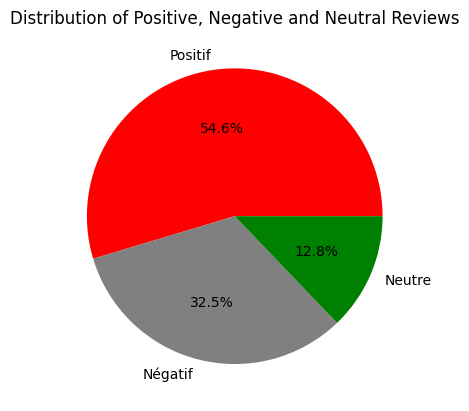

In [44]:
from sklearn.utils import resample

# Séparer les classes par label
df_positif = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Positif']
df_neutre = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Neutre']
df_negatif = augmented_df_antonyme_syno[augmented_df_antonyme_syno['Label'] == 'Négatif']

# Limiter le nombre de lignes de la classe 'Positif' (par exemple, à 1000 lignes)
df_positif_downsampled = resample(df_positif, 
                                  replace=False,  # Échantillonnage sans remplacement
                                  n_samples=1000,  # Choisir le nombre d'exemples à conserver
                                  random_state=42)  # Graine aléatoire pour la reproductibilité

# Recombiner les classes échantillonnées
df_balanced_reduced = pd.concat([df_negatif, df_neutre, df_positif_downsampled])

# Vérifier la distribution des labels après réduction
print("\nNombre de commentaires par label après réduction de la classe 'Positif' :")
print(df_balanced_reduced['Label'].value_counts())
count_labels=df_balanced_reduced['Label'].value_counts()
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels', color=['red', 'grey', 'green'], alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews')
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()